In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from matplotlib.lines import Line2D
import math
from PIL import Image

sys.path.append(str(Path("..").resolve()))
from src import *

A matching Triton is not available, some optimizations will not be enabled
Traceback (most recent call last):
  File "c:\Users\MrPio\AppData\Local\Programs\Python\Python310\lib\site-packages\xformers\__init__.py", line 57, in _is_triton_available
    import triton  # noqa
ModuleNotFoundError: No module named 'triton'


Cupy Available= 0


# Metric Visualizer [FFT]

In [2]:
METRICS_DIR=Path("metrics/synthetic")

In [6]:
def plot(file, use_lims=True, show_baseline=True):
    df = pd.read_csv(METRICS_DIR/file, index_col="suffx")
    baseline = df.loc["deepcad"]
    df = df.drop(index="deepcad")

    _, ax1 = plt.subplots(figsize=(18, 8), dpi=150)
    ax1.set_title("FFT Metrics")
    ax1.tick_params(axis="x", labelrotation=90)

    ax1.plot(df.index, df["PSNR"], marker="o", markersize=8, color="tab:blue", label="PSNR", linewidth=3)
    ax1.set_ylabel("PSNR3D (dB)")

    ax2 = ax1.twinx()
    ax2.plot(df.index, df["SSIM"], marker="s", markersize=8, linewidth=3, color="tab:orange", label="SSIM")
    ax2.set_ylabel("SSIM3D")

    if use_lims:
        y11, y12 = ax1.get_ylim()
        y11 = math.floor(y11)
        y12 = math.ceil(y12)
        ax1.set_yticks(np.linspace(y11, y12, 10), [f"{_:.1f}" for _ in np.linspace(y11, y12, 10)])

        y21, y22 = ax2.get_ylim()
        y21 = math.floor(y21 * 10) / 10
        y22 = math.ceil(y22 * 10) / 10
        ax2.set_yticks(np.linspace(y21, y22, 10), [f"{_:.2f}" for _ in np.linspace(y21, y22, 10)])

    if show_baseline:
        ax1.add_line(Line2D([0, len(df)], [baseline.PSNR] * 2, linestyle="--", linewidth=3, color="tab:blue"))
        ax2.add_line(Line2D([0, len(df)], [baseline.SSIM] * 2, linestyle="--", linewidth=3, color="tab:orange"))

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="lower right")
    plt.tight_layout()
    plt.show()
    cprint("Max PSNR=", f"cyan:{df['PSNR'].max():.2f}", "Max SSIM=", f"light_red:{df['SSIM'].max():.2f}")

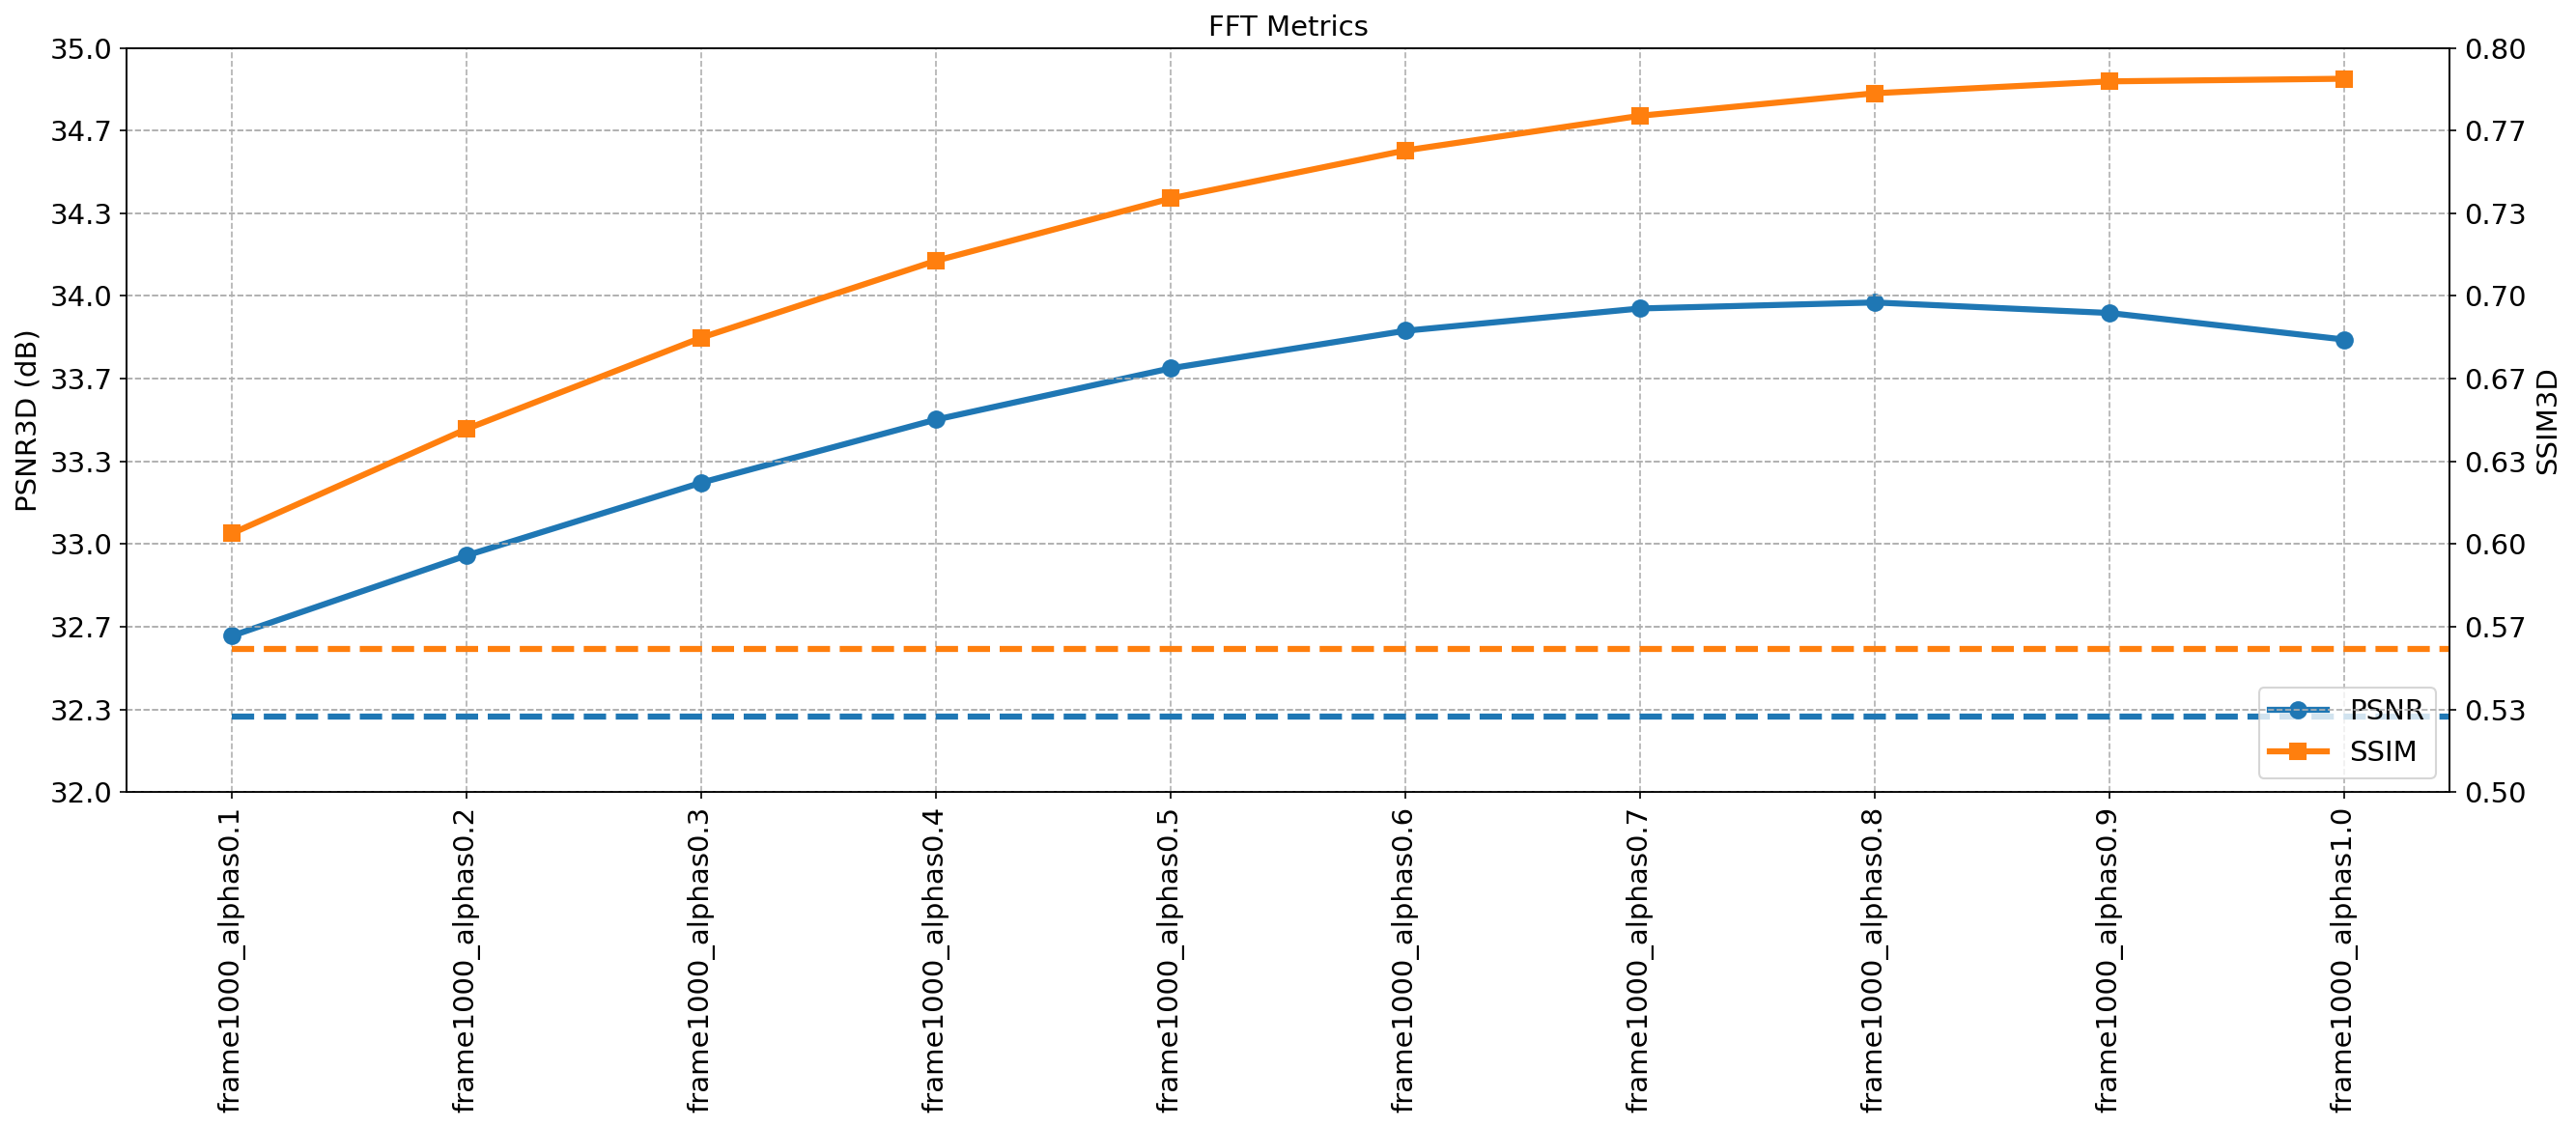

Max PSNR= 33.97 Max SSIM= 0.79


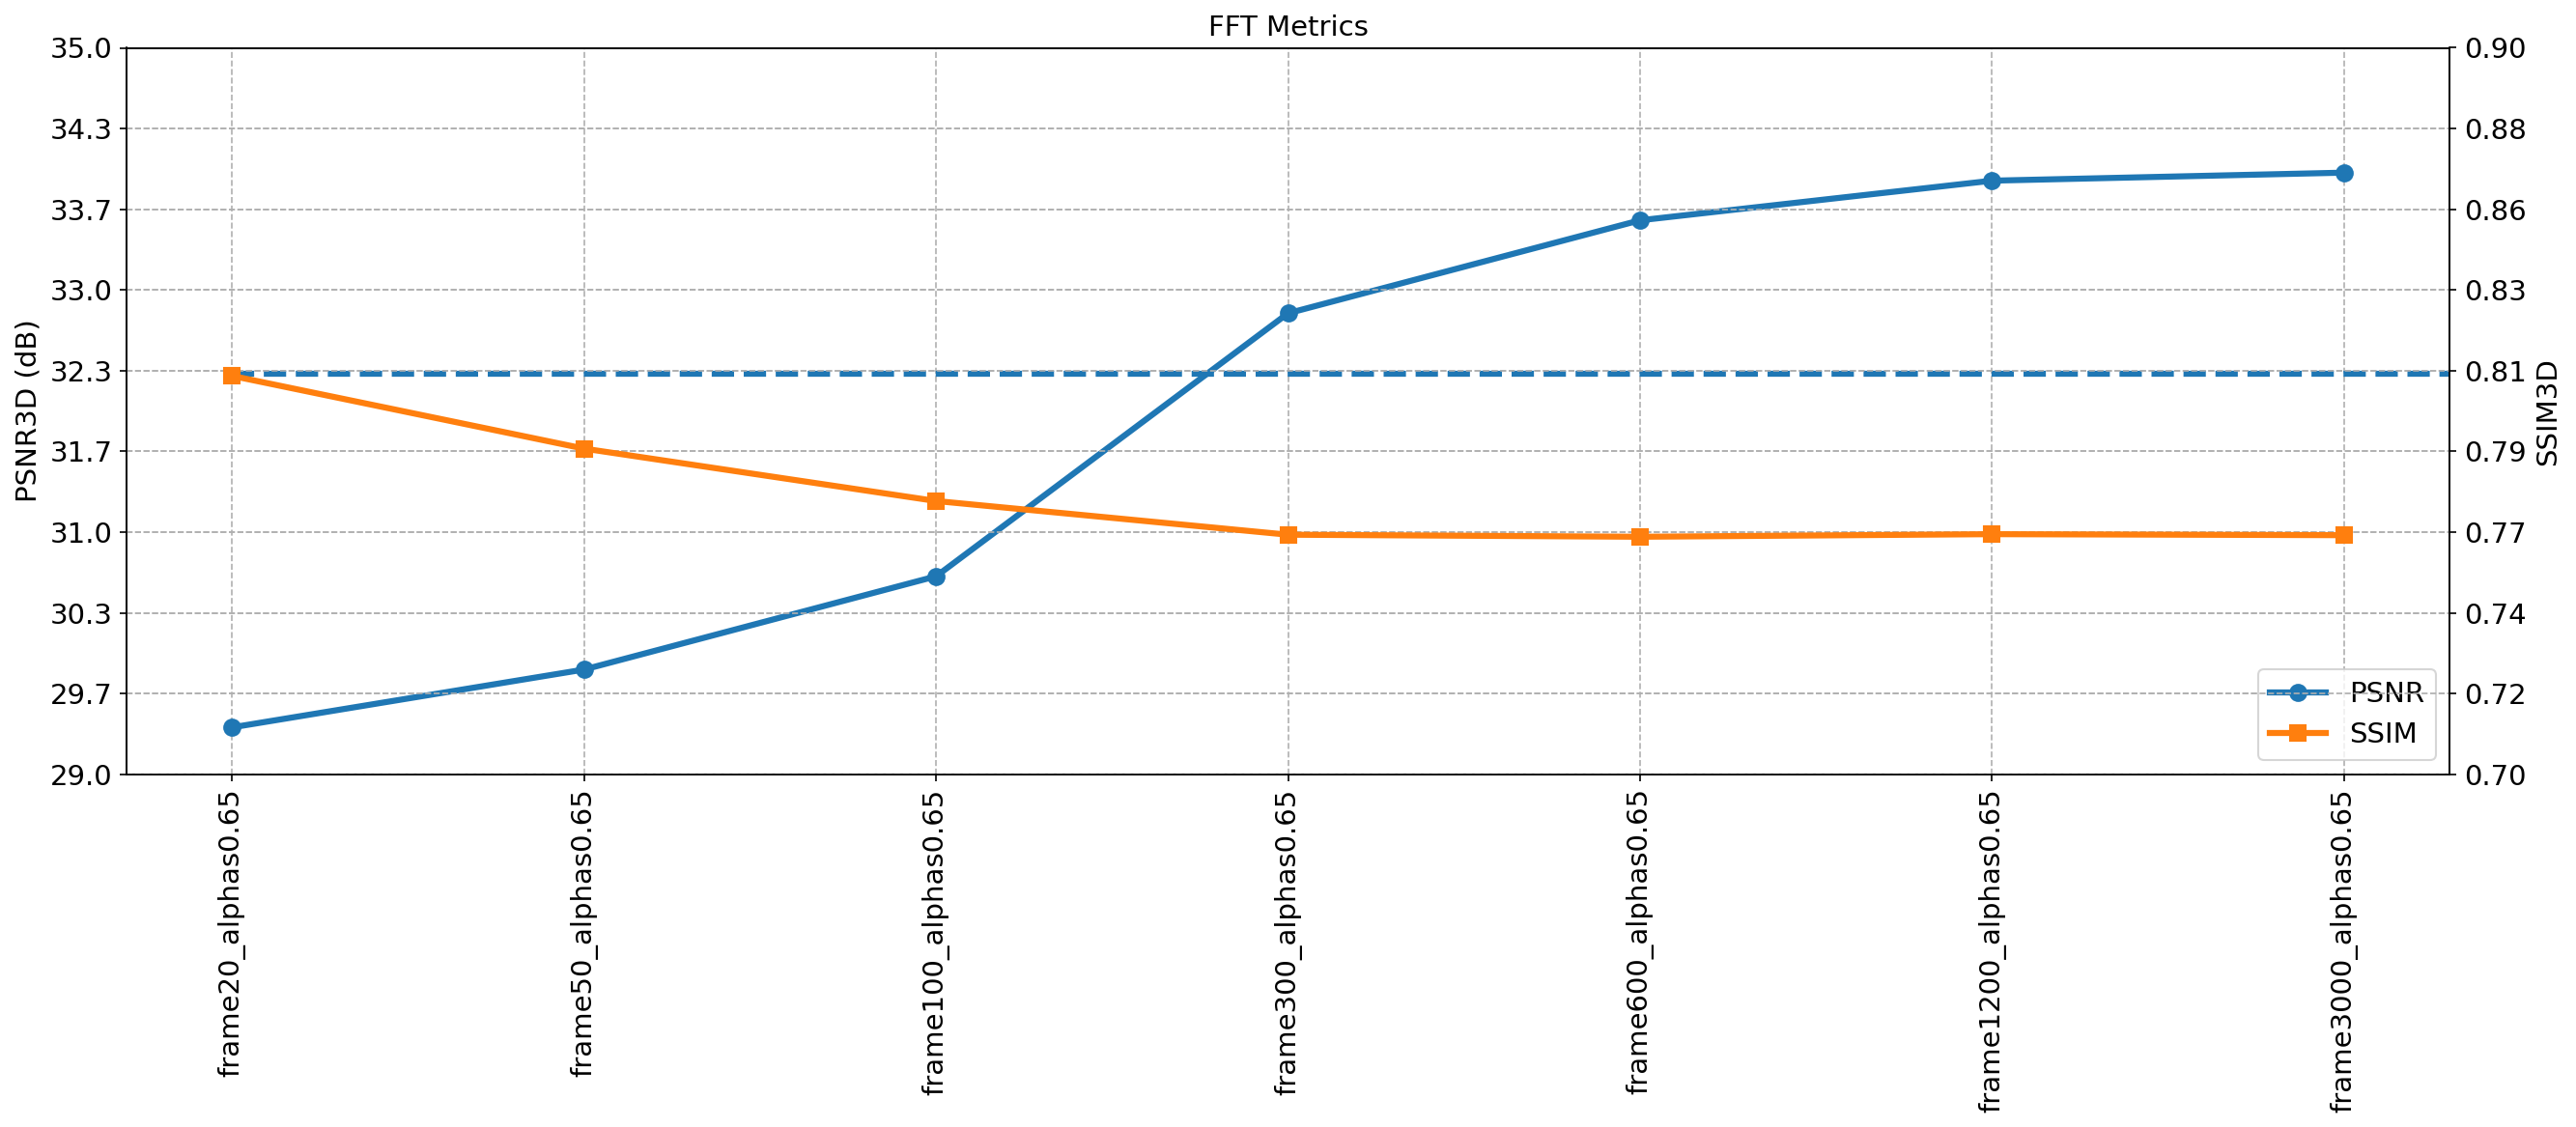

Max PSNR= 33.97 Max SSIM= 0.81


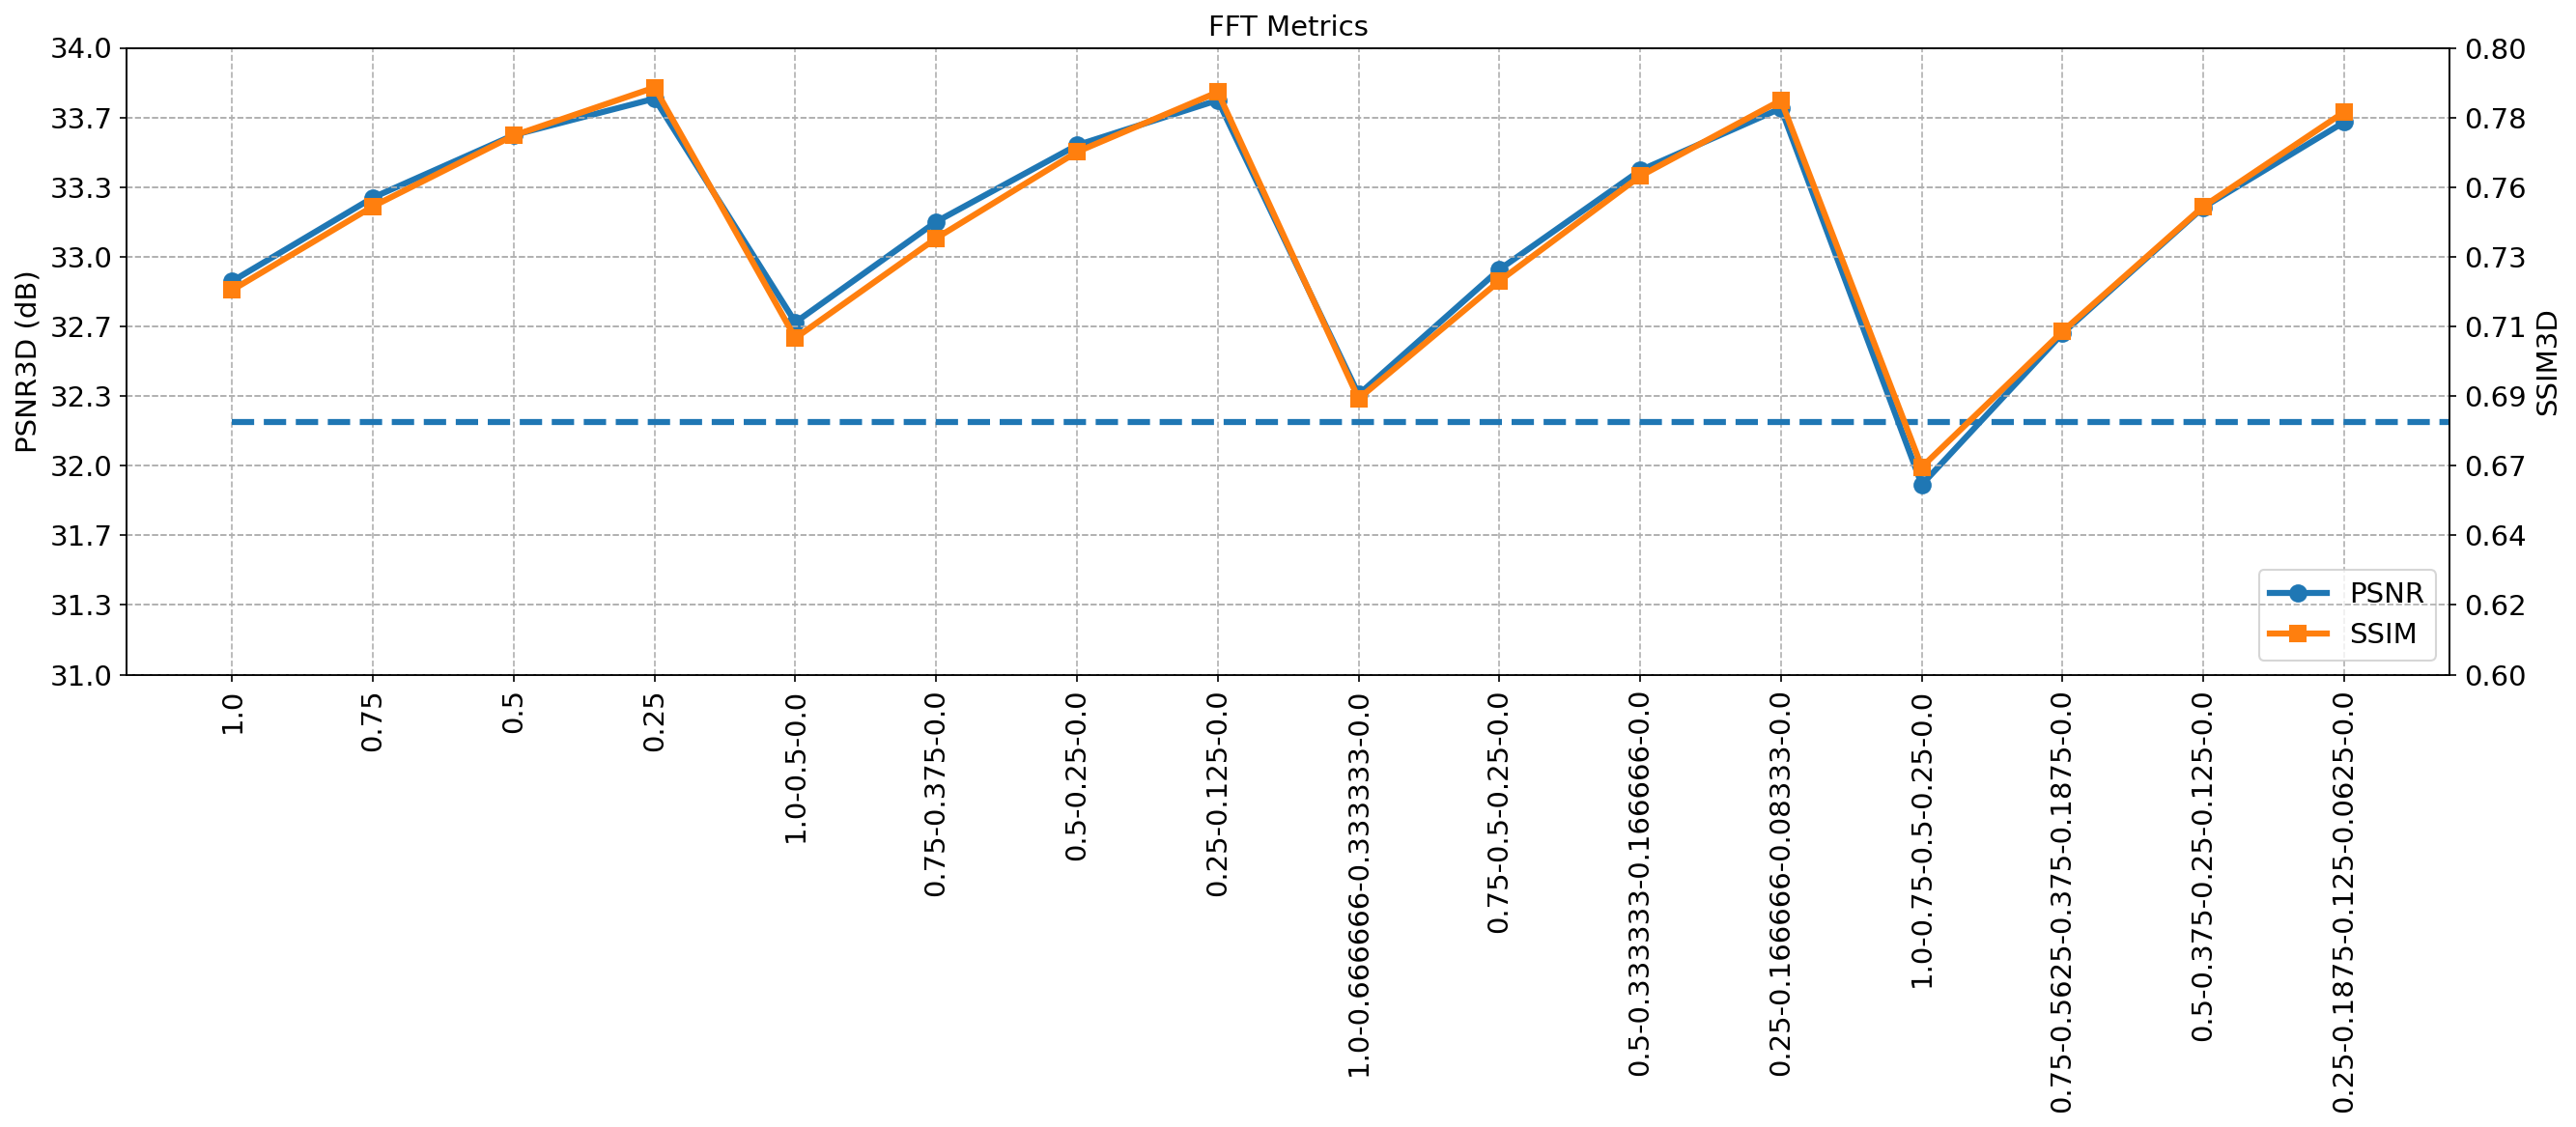

Max PSNR= 33.76 Max SSIM= 0.79


In [8]:
plot("fft_synthetic_metrics_alphas.csv")
plot("fft_synthetic_metrics_frames.csv")
plot("fft_synthetic_metrics_other_alphas.csv")

## Plot Frames

In [2]:
test_frame = 100

In [ ]:
meta = DATASETS["synthetic"]
ROOT_DIR = Path("..")
trainings = {
    "patcht_300": "3-video_fusion/results/synthetic/ftt_synthetic_frame3000_alphas0.85deepcad_300-150 norm.tiff",
    "patcht_150": "3-video_fusion/results/synthetic/ftt_synthetic_frame3000_alphas0.85deepcad_150-150 norm.tiff",
    "patcht_75": "3-video_fusion/results/synthetic/ftt_synthetic_frame3000_alphas0.85deepcad_75-150 norm.tiff",
    "patcht_30": "3-video_fusion/results/synthetic/ftt_synthetic_frame3000_alphas0.85_30-150 norm.tiff",
    "patcht_15": "3-video_fusion/results/synthetic/ftt_synthetic_frame3000_alphas0.85_15-150 norm.tiff",
}
gt=Recording(meta.gt, max_frames=test_frame).normalized[-1]

In [4]:
OUT_DIR = mkdir("fft_results")
METRICS_PATH = OUT_DIR / "metrics.csv"
df = (
    pd.read_csv(METRICS_PATH, index_col="suffx")
    if METRICS_PATH.exists()
    else pd.DataFrame(columns=["suffx", "PSNR", "SSIM"]).set_index("suffx")
)

In [8]:
for suffx, path in trainings.items():
    pred=Recording(ROOT_DIR/path, max_frames=test_frame).normalized[-1]
    df.loc[suffx] = [p:=psnr(pred, gt), s:=ssim(pred, gt)]
    cprint(f"red:[{suffx}]","PSNR=",p,"SSIM=",s)
    Image.fromarray(pred * 255).convert("RGB").save(OUT_DIR / f"{suffx}.png")
df.to_csv(METRICS_PATH)

[patcht_300] PSNR= 31.082468377280005 SSIM= 0.8964692380330318
[patcht_150] PSNR= 32.251128777558925 SSIM= 0.8898824659643009
[patcht_75] PSNR= 30.690016550323065 SSIM= 0.8890288638059282
[patcht_30] PSNR= 30.80729330845193 SSIM= 0.8797001234948387
[patcht_15] PSNR= 26.192851387237774 SSIM= 0.857827387608663
